In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load optimized dataset
opt_df = pd.read_csv("sweetspot_optimized.csv")

# Convert all applicable columns to numeric
def convert_to_numeric(df):
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

opt_df = convert_to_numeric(opt_df)

# Define feature and target variables
features = ['Bottomhole X', 'Bottomhole Y', 'POROS', 'KX', 'KY', 'TD(MD)', 'Pressure_Drawdown', 'P_2020-1-6', 'P_2029-1-1']
target_oil = 'Co [MSTB]'
target_gas = 'Cg (mmcf)'

# Drop rows with missing values
opt_df = opt_df.dropna(subset=features + [target_oil, target_gas])



In [8]:
# Split data into training and test sets
X_train, X_test, y_train_oil, y_test_oil = train_test_split(opt_df[features], opt_df[target_oil], test_size=0.2, random_state=42)
X_train, X_test, y_train_gas, y_test_gas = train_test_split(opt_df[features], opt_df[target_gas], test_size=0.2, random_state=42)

# Train Random Forest Models
rf_oil = RandomForestRegressor(n_estimators=100, random_state=42)
rf_gas = RandomForestRegressor(n_estimators=100, random_state=42)
rf_oil.fit(X_train, y_train_oil)
rf_gas.fit(X_train, y_train_gas)

# Predictions
y_pred_oil = rf_oil.predict(X_test)
y_pred_gas = rf_gas.predict(X_test)



In [9]:
# Evaluate Model Performance
def evaluate_model(y_true, y_pred, target_name):
    print(f"{target_name} Model Performance:")
    print(f"R² Score: {r2_score(y_true, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.3f}\n")

evaluate_model(y_test_oil, y_pred_oil, "Oil Production")
evaluate_model(y_test_gas, y_pred_gas, "Gas Production")



Oil Production Model Performance:
R² Score: 0.712
MAE: 13.582
RMSE: 21.256

Gas Production Model Performance:
R² Score: 0.955
MAE: 30.652
RMSE: 37.964



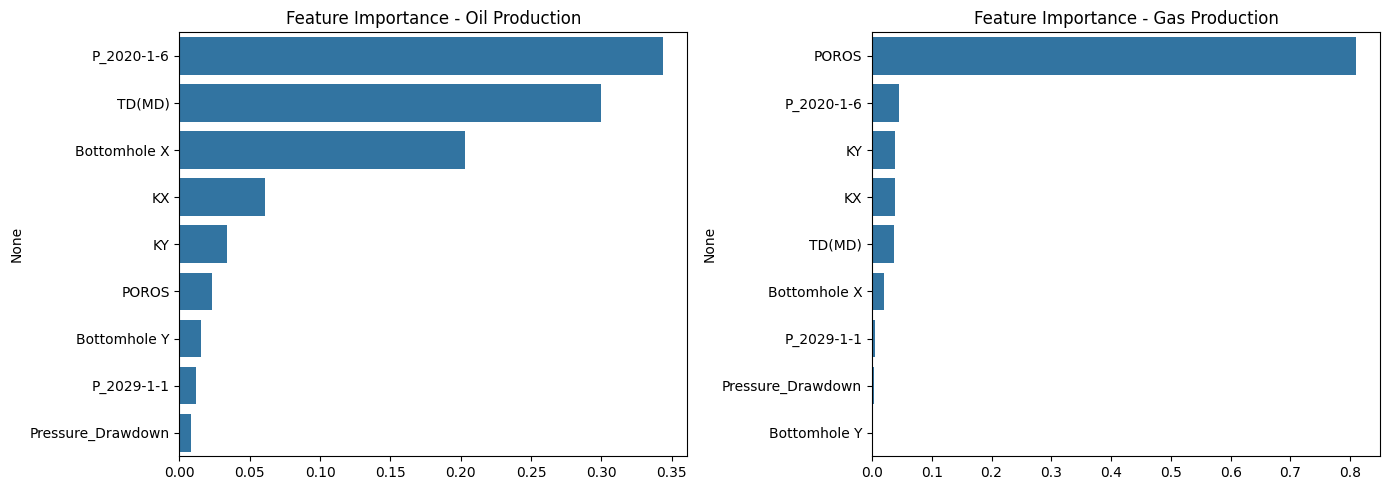

In [10]:
# Feature Importance
feat_importances_oil = pd.Series(rf_oil.feature_importances_, index=features).sort_values(ascending=False)
feat_importances_gas = pd.Series(rf_gas.feature_importances_, index=features).sort_values(ascending=False)

# Plot Feature Importances
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x=feat_importances_oil.values, y=feat_importances_oil.index, ax=axes[0])
axes[0].set_title("Feature Importance - Oil Production")
sns.barplot(x=feat_importances_gas.values, y=feat_importances_gas.index, ax=axes[1])
axes[1].set_title("Feature Importance - Gas Production")
plt.tight_layout()
plt.show()
